## Анализ и оптимизация работы розничных магазинов.

2. Проблемная область: Анализ и оптимизация работы розничных магазинов.

Данные включают информацию о магазинах, такую как площадь, количество доступных товаров, количество посетителей в день и продажи.

3. Объекты наблюдения: Магазины.

4. Бизнес-цель: Оптимизация распределения товаров в магазинах для увеличения продаж.

Эффект для бизнеса: Увеличение прибыли за счет более эффективного использования площади и товарного запаса.

5. Техническая цель: Создание модели, предсказывающей продажи магазина на основе его площади, количества товаров и количества посетителей.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Загрузка данных
stores_pd = pd.read_csv('static/csv/Stores.csv')

Визуалзиация данных с помощью диаграмм рассеивания

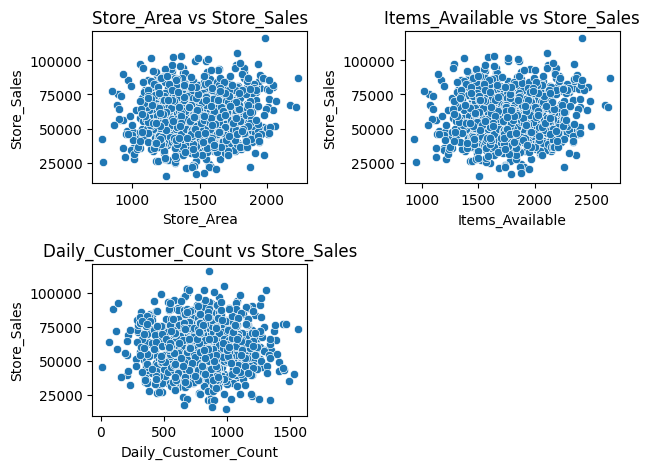

In [12]:
# Диаграмма рассеяния для Store_Area и Store_Sales
plt.subplot(2, 2, 1)
sns.scatterplot(x='Store_Area', y='Store_Sales', data=stores_pd)
plt.title('Store_Area vs Store_Sales')

# Разбиение на обучающую, контрольную и тестовую выборки
train_df, test_df = train_test_split(stores_pd, test_size=0.4, random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Диаграмма рассеяния для Items_Available и Store_Sales
plt.subplot(2, 2, 2)
sns.scatterplot(x='Items_Available', y='Store_Sales', data=stores_pd)
plt.title('Items_Available vs Store_Sales')

# Диаграмма рассеяния для Daily_Customer_Count и Store_Sales
plt.subplot(2, 2, 3)
sns.scatterplot(x='Daily_Customer_Count', y='Store_Sales', data=stores_pd)
plt.title('Daily_Customer_Count vs Store_Sales')

plt.tight_layout()
plt.show()

Определение и удаление выбросов происходит с помощь метода межквартильного размаха IQR. Выбросами считаются точки, которые лежат за пределами Q1 - 1.5 * IQR и Q3 + 1.5 * IQR.

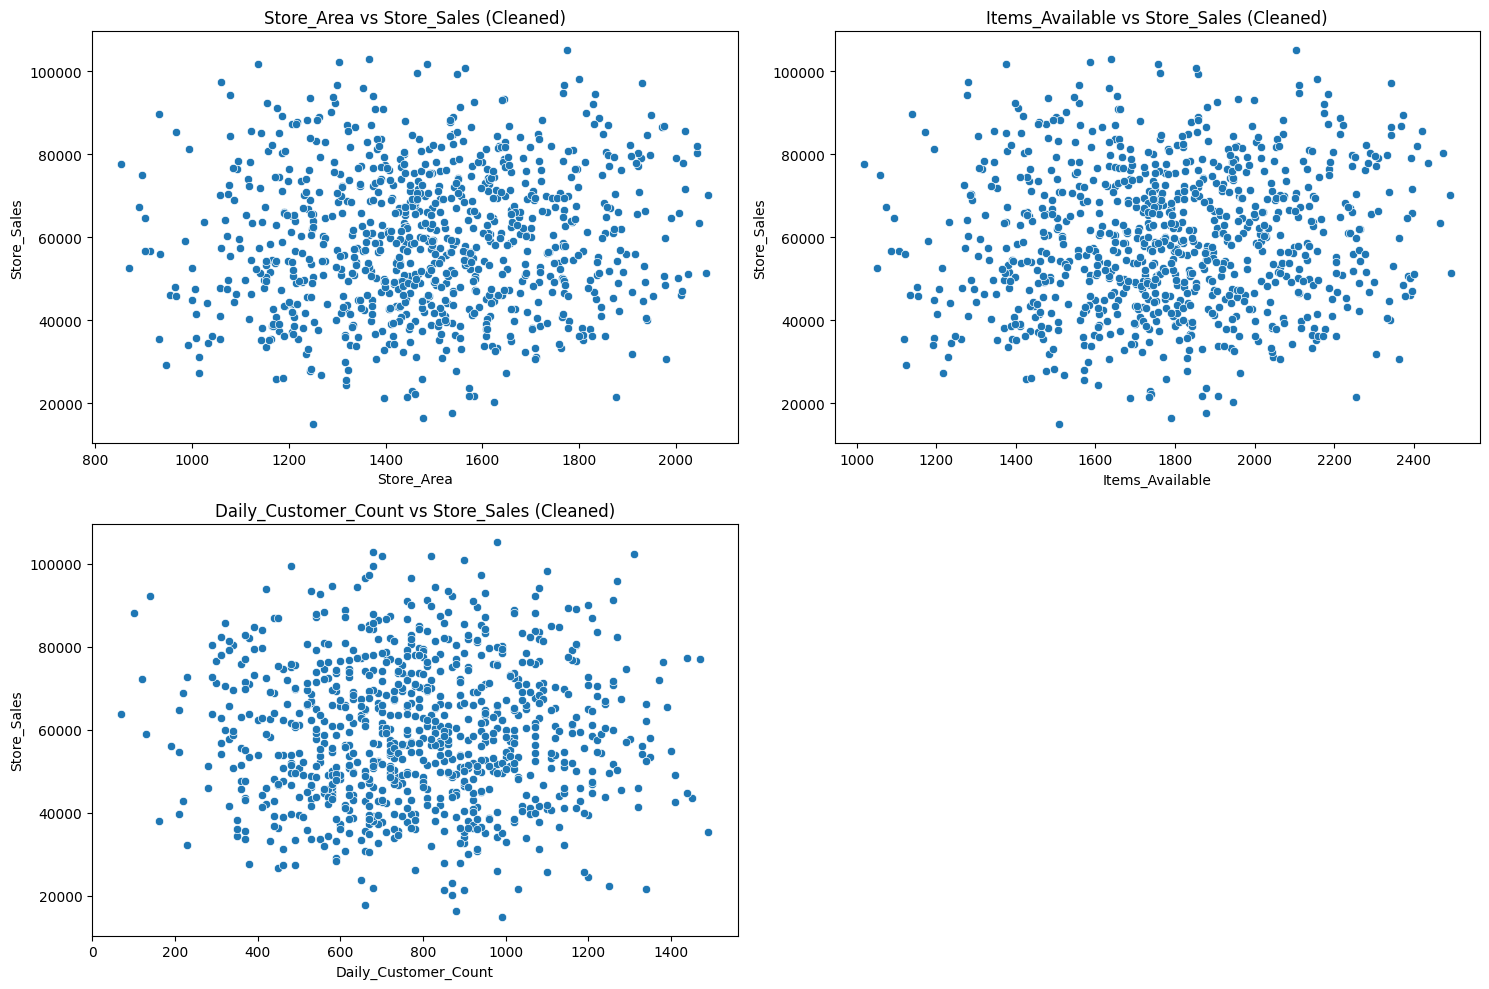

In [5]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удаление выбросов для каждой пары переменных
stores_cleaned = stores_pd.copy()
stores_cleaned = remove_outliers(stores_cleaned, 'Store_Area')
stores_cleaned = remove_outliers(stores_cleaned, 'Items_Available')
stores_cleaned = remove_outliers(stores_cleaned, 'Daily_Customer_Count')
stores_cleaned = remove_outliers(stores_cleaned, 'Store_Sales')

# Визуализация очищенных данных
plt.figure(figsize=(15, 10))

# Диаграмма рассеяния для Store_Area и Store_Sales
plt.subplot(2, 2, 1)
sns.scatterplot(x='Store_Area', y='Store_Sales', data=stores_cleaned)
plt.title('Store_Area vs Store_Sales (Cleaned)')

# Диаграмма рассеяния для Items_Available и Store_Sales
plt.subplot(2, 2, 2)
sns.scatterplot(x='Items_Available', y='Store_Sales', data=stores_cleaned)
plt.title('Items_Available vs Store_Sales (Cleaned)')

# Диаграмма рассеяния для Daily_Customer_Count и Store_Sales
plt.subplot(2, 2, 3)
sns.scatterplot(x='Daily_Customer_Count', y='Store_Sales', data=stores_cleaned)
plt.title('Daily_Customer_Count vs Store_Sales (Cleaned)')

plt.tight_layout()
plt.show()

## Анализ и прогнозирование экономических показателей стран.

2. Проблемная область: Анализ и прогнозирование экономических показателей стран.

Данные содержат экономические показатели 9 стран за период с 1980 по 2020 год, включая индексы, инфляцию, цены на нефть, курсы валют и другие показатели.

3. Объекты наблюдения: Страны.

4. Бизнес-цель: Прогнозирование экономических показателей для принятия инвестиционных решений.

Эффект для бизнеса: Увеличение доходности инвестиций за счет более точного прогнозирования рыночных условий.

5. Техническая цель: Разработка модели прогнозирования инфляции на основе исторических данных.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Загрузка данных
economic_df = pd.read_csv('static/csv/Economic Data - 9 Countries (1980-2020).csv')

Визуализация данных с помощью диаграмм рассеивания

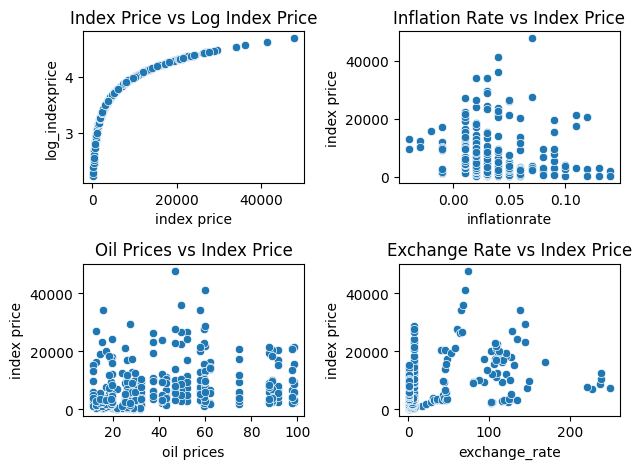

In [13]:
# Диаграмма рассеяния для index price и log_indexprice
plt.subplot(2, 2, 1)
sns.scatterplot(x='index price', y='log_indexprice', data=economic_df)
plt.title('Index Price vs Log Index Price')

# Диаграмма рассеяния для inflationrate и index price
plt.subplot(2, 2, 2)
sns.scatterplot(x='inflationrate', y='index price', data=economic_df)
plt.title('Inflation Rate vs Index Price')

# Разбиение на обучающую, контрольную и тестовую выборки
train_df, test_df = train_test_split(economic_df, test_size=0.4, random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Диаграмма рассеяния для oil prices и index price
plt.subplot(2, 2, 3)
sns.scatterplot(x='oil prices', y='index price', data=economic_df)
plt.title('Oil Prices vs Index Price')

# Диаграмма рассеяния для exchange_rate и index price
plt.subplot(2, 2, 4)
sns.scatterplot(x='exchange_rate', y='index price', data=economic_df)
plt.title('Exchange Rate vs Index Price')

plt.tight_layout()
plt.show()

Определение и удаление выбросов происходит с помощь метода межквартильного размаха IQR. Выбросами считаются точки, которые лежат за пределами Q1 - 1.5 * IQR и Q3 + 1.5 * IQR.

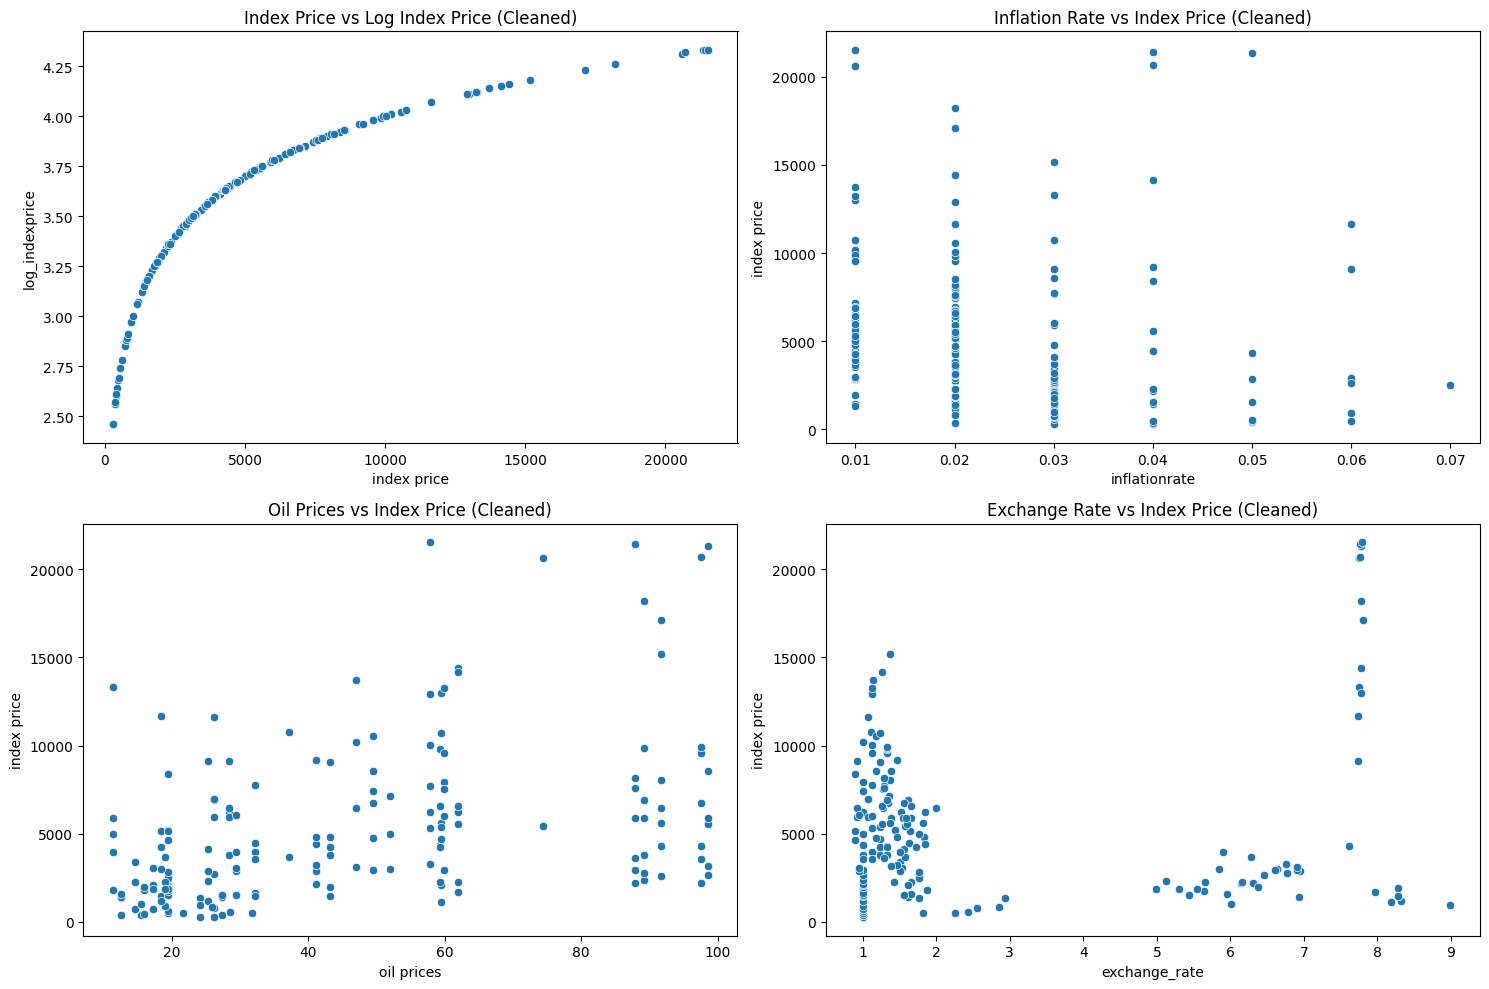

In [12]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удаление выбросов для каждой пары переменных
economic_cleaned = economic_df.copy()
economic_cleaned = remove_outliers(economic_cleaned, 'index price')
economic_cleaned = remove_outliers(economic_cleaned, 'log_indexprice')
economic_cleaned = remove_outliers(economic_cleaned, 'inflationrate')
economic_cleaned = remove_outliers(economic_cleaned, 'oil prices')
economic_cleaned = remove_outliers(economic_cleaned, 'exchange_rate')

# Визуализация очищенных данных
plt.figure(figsize=(15, 10))

# Диаграмма рассеяния для index price и log_indexprice
plt.subplot(2, 2, 1)
sns.scatterplot(x='index price', y='log_indexprice', data=economic_cleaned)
plt.title('Index Price vs Log Index Price (Cleaned)')

# Диаграмма рассеяния для inflationrate и index price
plt.subplot(2, 2, 2)
sns.scatterplot(x='inflationrate', y='index price', data=economic_cleaned)
plt.title('Inflation Rate vs Index Price (Cleaned)')

# Диаграмма рассеяния для oil prices и index price
plt.subplot(2, 2, 3)
sns.scatterplot(x='oil prices', y='index price', data=economic_cleaned)
plt.title('Oil Prices vs Index Price (Cleaned)')

# Диаграмма рассеяния для exchange_rate и index price
plt.subplot(2, 2, 4)
sns.scatterplot(x='exchange_rate', y='index price', data=economic_cleaned)
plt.title('Exchange Rate vs Index Price (Cleaned)')

plt.tight_layout()
plt.show()

## Анализ рынка труда для специалистов по данным.

2. Проблемная область: Анализ рынка труда для специалистов по данным.

Данные включают информацию о зарплатах специалистов по данным, такую как уровень опыта, тип занятости, зарплату в долларах США и другие атрибуты.

3. Объекты наблюдения: Специалисты по данным.

4. Бизнес-цель: Анализ рынка труда для специалистов по данным для оптимизации кадровой политики.

Эффект для бизнеса: Улучшение привлечения и удержания талантов за счет более конкурентоспособной оплаты труда.

5. Техническая цель: Создание модели, предсказывающей зарплату специалиста по данным на основе его уровня опыта и типа занятости.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Загрузка данных
salaries_df = pd.read_csv('static/csv/ds_salaries.csv')

# Выбор столбца для анализа (например, salary_in_usd)
data = salaries_df['salary_in_usd']

Визуализация данных с помощью диаграмм рассеивания

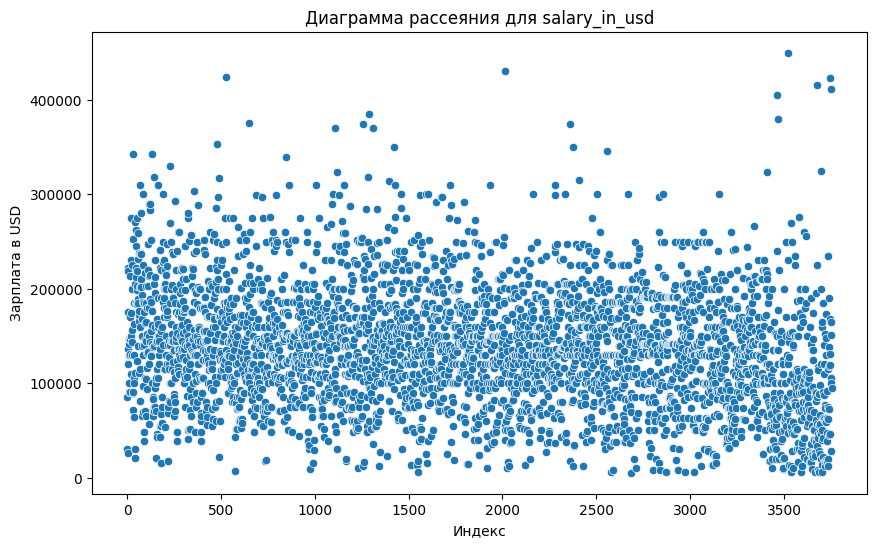

In [18]:
# Построение диаграммы рассеяния (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(data)), y=data)
plt.title('Диаграмма рассеяния для salary_in_usd')
plt.xlabel('Индекс')
plt.ylabel('Зарплата в USD')
plt.show()

Определение и удаление выбросов происходит с помощь метода межквартильного размаха IQR. Выбросами считаются точки, которые лежат за пределами Q1 - 1.5 * IQR и Q3 + 1.5 * IQR.

Количество выбросов: 63


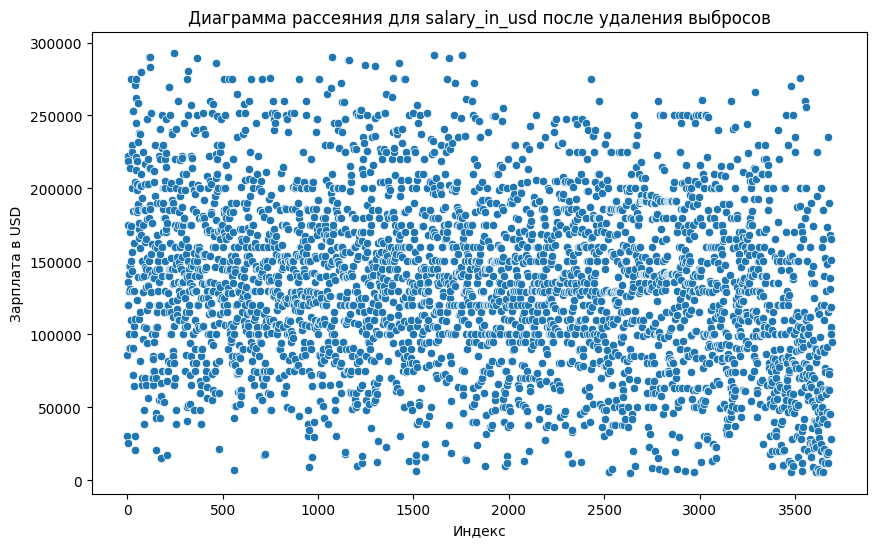

In [15]:
# Определение выбросов с использованием межквартильного размаха (IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Выбросы — это значения, которые лежат за пределами 1.5 * IQR от Q1 и Q3
outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
print(f'Количество выбросов: {len(outliers)}')

# Разбиение на обучающую, контрольную и тестовую выборки
train_df, test_df = train_test_split(salaries_df, test_size=0.4, random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Удаление выбросов
filtered_data = data[(data >= (Q1 - 1.5 * IQR)) & (data <= (Q3 + 1.5 * IQR))]

# Построение диаграммы рассеяния после удаления выбросов
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(filtered_data)), y=filtered_data)
plt.title('Диаграмма рассеяния для salary_in_usd после удаления выбросов')
plt.xlabel('Индекс')
plt.ylabel('Зарплата в USD')
plt.show()